In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import joblib


In [ ]:
df = pd.read_csv("bcsc_risk_factors_summarized1_092020.csv")
# Check original dataset size
print("Original dataset size:", df.shape)

# Randomly sample 10,000 rows
df = df.sample(n=10000, random_state=42)

# Reset index
df.reset_index(drop=True, inplace=True)

print("Sampled dataset size:", df.shape)

df.head()

In [49]:
# Drop columns with too many missing values or irrelevant identifiers
df = df.drop(columns=[col for col in df.columns if "unnamed" in col.lower()], errors='ignore')

df.head()


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,2013,7,1,0,9,3,1,1,2,3,0,0,7
1,2013,7,1,0,9,3,1,1,2,3,1,0,3
2,2013,7,1,0,9,3,1,1,2,4,0,0,6
3,2013,7,1,0,9,3,1,1,2,4,1,0,1
4,2013,7,1,0,9,3,1,1,2,4,1,1,1


In [51]:
df.isnull().sum()


year                     0
age_group_5_years        0
race_eth                 0
first_degree_hx          0
age_menarche             0
age_first_birth          0
BIRADS_breast_density    0
current_hrt              0
menopaus                 0
bmi_group                0
biophx                   0
breast_cancer_history    0
count                    0
dtype: int64

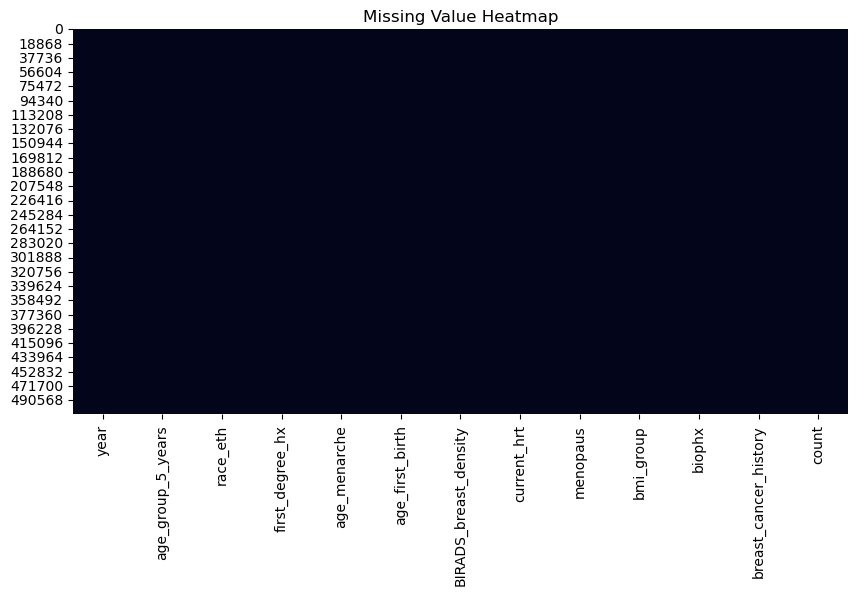

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


In [54]:
df = df.dropna()


In [55]:
encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])


In [56]:
target_col = 'breast_cancer_history'

scaler = StandardScaler()

numerical_cols = df.drop(columns=[target_col]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


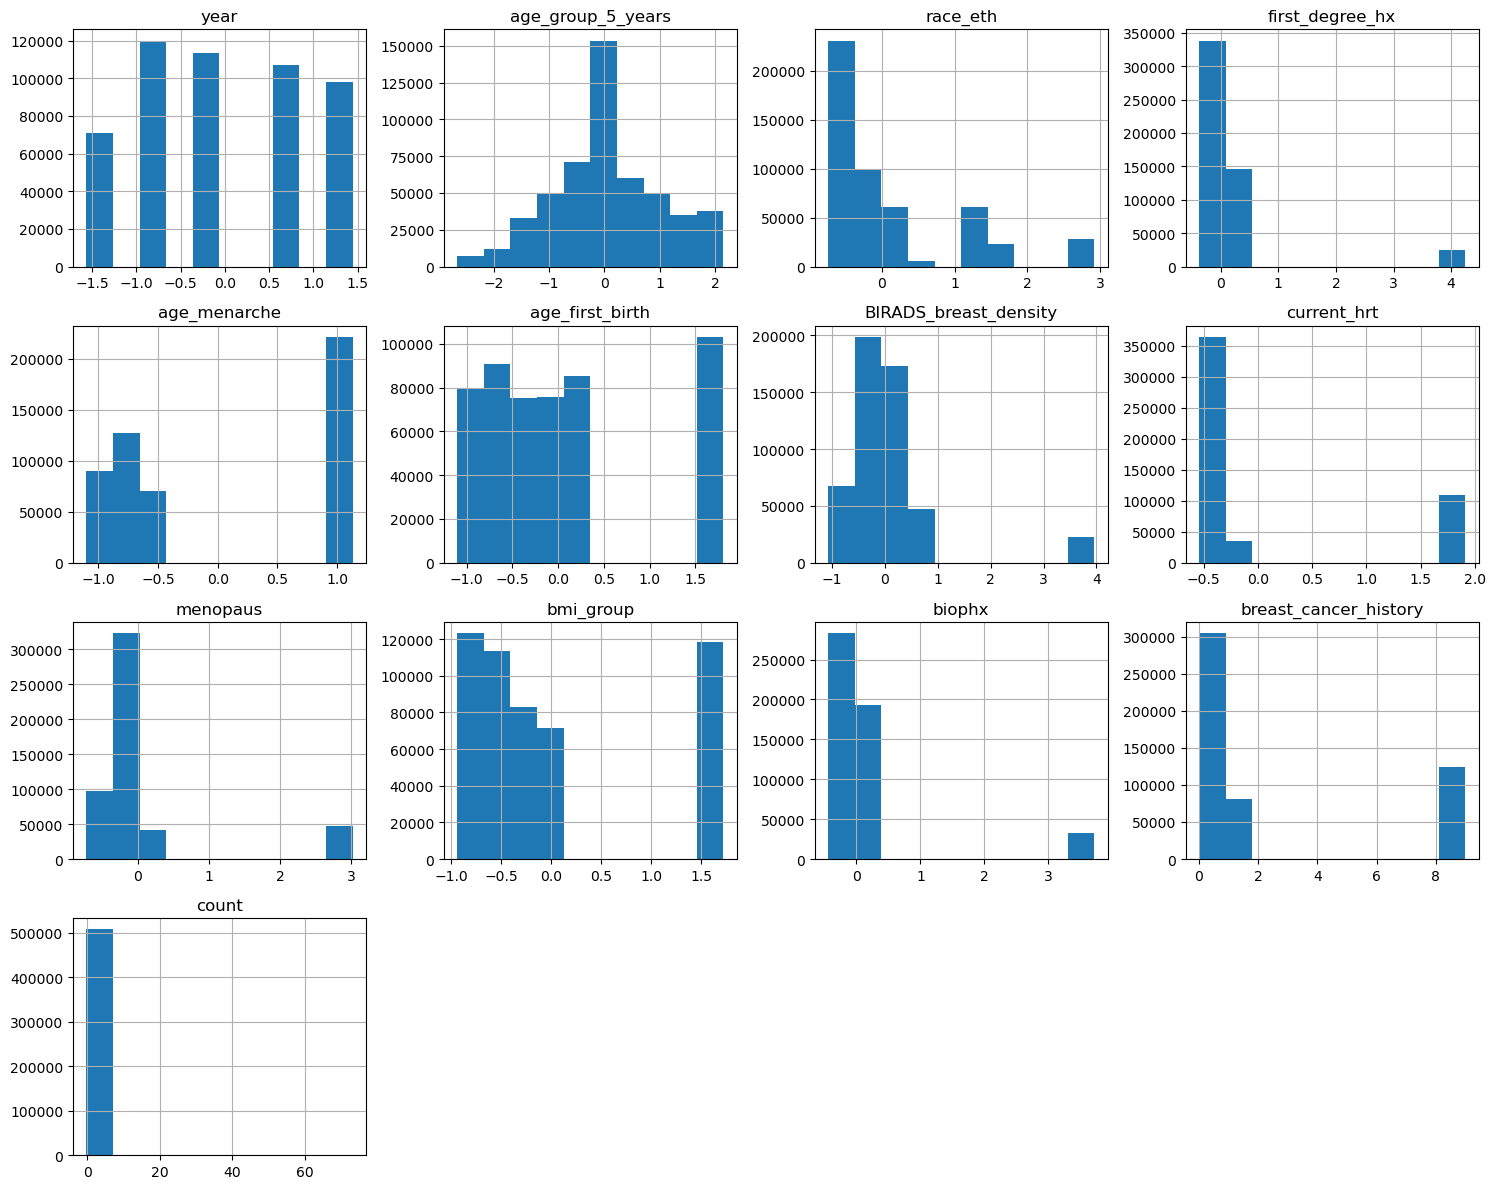

In [61]:
df.hist(figsize=(15,12))
plt.tight_layout()
plt.show()


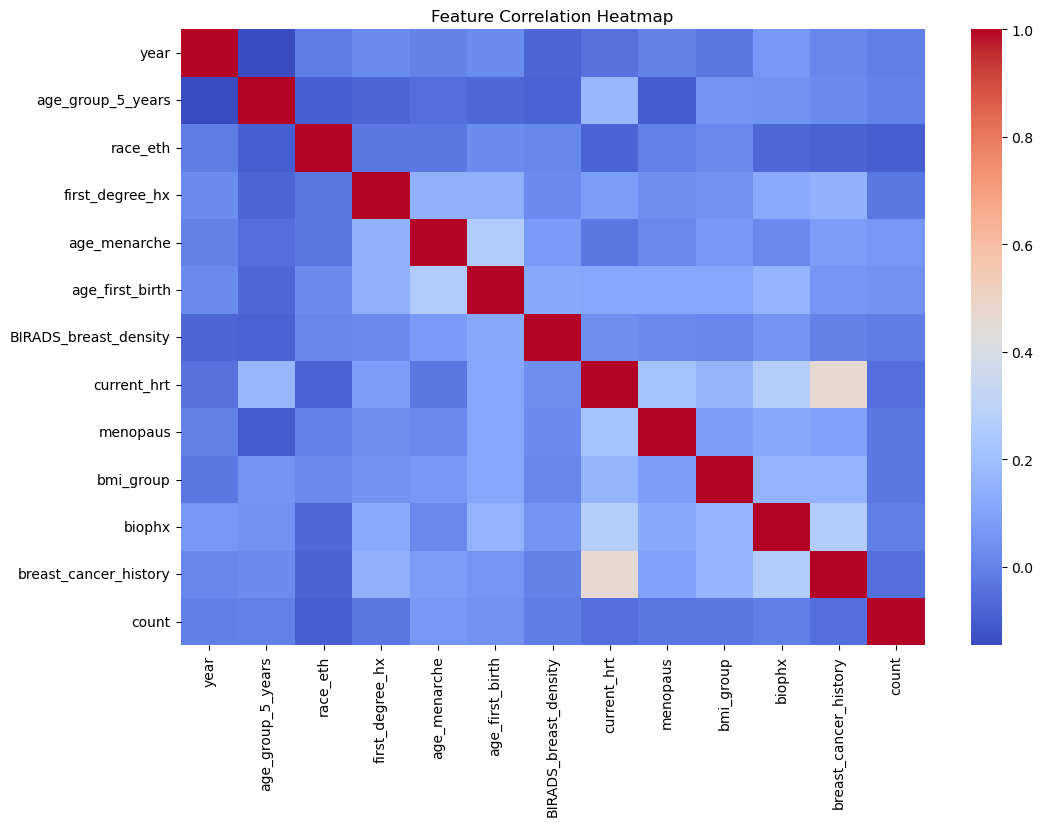

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [65]:
X = df.drop(columns=['breast_cancer_history'])
y = df['breast_cancer_history']


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [69]:
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC()


In [71]:
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC()


In [ ]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "SVM": svm
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))


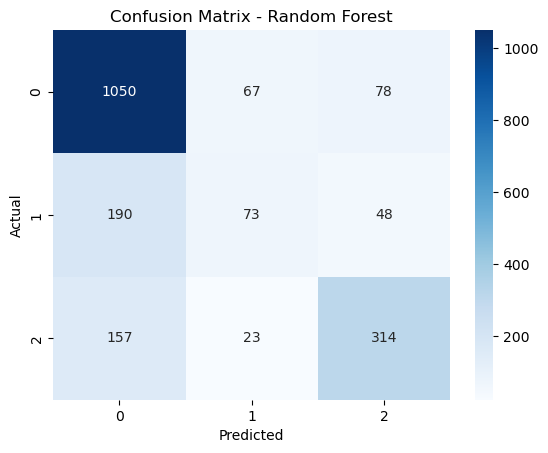

In [39]:
cm = confusion_matrix(y_test, rf.predict(X_test))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [41]:
joblib.dump(rf, "best_breast_cancer_model.pkl")


['best_breast_cancer_model.pkl']

In [43]:
def predict_breast_cancer():
    user_data = []
    for col in X.columns:
        value = float(input(f"Enter value for {col}: "))
        user_data.append(value)
    
    user_df = pd.DataFrame([user_data], columns=X.columns)
    user_df[numerical_cols] = scaler.transform(user_df[numerical_cols])
    
    model = joblib.load("best_breast_cancer_model.pkl")
    prediction = model.predict(user_df)
    
    print("Prediction:", "Yes (Cancer Risk)" if prediction[0] == 1 else "No (Low Risk)")

predict_breast_cancer()


Enter value for year:  2002
Enter value for age_group_5_years:  30
Enter value for race_eth:  37
Enter value for first_degree_hx:  49
Enter value for age_menarche:  34
Enter value for age_first_birth:  23
Enter value for BIRADS_breast_density:  23
Enter value for current_hrt:  23
Enter value for menopaus:  23
Enter value for bmi_group:  23
Enter value for biophx:  45
Enter value for count:  34


Prediction: No (Low Risk)
